In [1]:
# !wget https://raw.githubusercontent.com/manthi4/GeneticTensor/main/b_functions.py
# !wget https://raw.githubusercontent.com/manthi4/GeneticTensor/main/experiments.py

In [2]:
# !wget https://raw.githubusercontent.com/manthi4/GeneticTensor/main/simulations.py


In [3]:
import numpy as np
from tqdm import tqdm
from simulations import *
from b_functions import *
from experiments import *
import multiprocessing
import threading

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

In [4]:
# show_all()

In [5]:
pop_search_space = np.linspace(30, 100, 40)
std_search_space = np.linspace(1, 50, 60)
pops, stds = np.meshgrid(pop_search_space, std_search_space)



In [6]:
# search_range = (-100, 100)
# dim = 1
# runs = 20
# keep_n = lambda pop: len(pop) //4

# num_threads = multiprocessing.cpu_count()
# times = np.zeros_like(pops)
# convergence = np.zeros_like(pops)

# for i in tqdm(range(len(pops))):
#     for j in range(len(pops[i])):
#         sigma = stds[i][j]
#         p0_size = int(pops[i][j])
#         global tt
#         global c
#         tt = 0
#         c = 0
#         lck = threading.Lock()

#         def thread_fn():
#           global tt
#           global c
#           pop_avg, _, _, t = linear_population_fixed_std(search_range, dim, p0_size, keep_n_linear, sigma, parabola)
#           lck.acquire()
#           c += (0 - np.mean(pop_avg[-5:]))**2
#           tt += t
#           lck.release()

#         worker_threads = [threading.Thread(target= thread_fn, args=()) for it in range(num_threads)]
#         for t in worker_threads:
#           # print("running thread ", t)
#           t.start()

#         for t in worker_threads:
#           t.join()

#         times[i, j] = tt/runs
#         convergence[i, j] = float(c/runs)

In [7]:
keep_n_linear = lambda pop: max(1, (len(pop)-10)//2)
keep_n_geom = lambda pop: int(max(1, len(pop) //3))

In [82]:
search_range = (-100, 100)
dim = 1
runs = 2
fn  = local_minima
minimum = 0
reduction_sims = {
  "fixed_population_fixed_std" : lambda p0_size, sigma: fixed_population_fixed_std(search_range, dim, p0_size, sigma, fn),
  "linear_population_fixed_std" : lambda p0_size, sigma: linear_population_fixed_std(search_range, dim, p0_size, keep_n_linear, sigma, fn),
  "geom_population_fixed_std" : lambda p0_size, sigma: geom_population_fixed_std(search_range, dim, p0_size,keep_n_geom, sigma, fn),
  "fit_population_fixed_std" : lambda p0_size, sigma: fit_population_fixed_std(search_range, dim, p0_size,keep_n_fit, sigma, fn),
  "fixed_population_linear_std" : lambda p0_size, sigma: fixed_population_linear_std(search_range, dim, p0_size, sigma, 5, fn),
  "fixed_population_geom_std" : lambda p0_size, sigma: fixed_population_geom_std(search_range, dim, p0_size, sigma, .5, fn)
}

times_ = {}
convergences_ = {}

for name, red_sim in reduction_sims.items():
  t, c = base_experiment(red_sim, runs, minimum)
  times_[name] = t
  convergences_[name] = c



100%|██████████| 60/60 [23:39<00:00, 23.66s/it]


In [74]:
# times, convergence_e = base_experiment(reduction_sims["fixed_population_geom_std"], 1, minimum)

In [75]:
pops[0]

array([ 30.        ,  31.79487179,  33.58974359,  35.38461538,
        37.17948718,  38.97435897,  40.76923077,  42.56410256,
        44.35897436,  46.15384615,  47.94871795,  49.74358974,
        51.53846154,  53.33333333,  55.12820513,  56.92307692,
        58.71794872,  60.51282051,  62.30769231,  64.1025641 ,
        65.8974359 ,  67.69230769,  69.48717949,  71.28205128,
        73.07692308,  74.87179487,  76.66666667,  78.46153846,
        80.25641026,  82.05128205,  83.84615385,  85.64102564,
        87.43589744,  89.23076923,  91.02564103,  92.82051282,
        94.61538462,  96.41025641,  98.20512821, 100.        ])

In [62]:
def plot63d(pops, stds, values, title):
  fig = plt.figure(figsize=(20,13))
  fig.suptitle(title, fontsize = 20)
  for i, (name, vals) in enumerate(values.items()):
    j = i+1
    ax = fig.add_subplot(2, 3, j, projection='3d')
    ax.plot_surface(pops, stds, vals, cmap='plasma')
    ax.set_xlabel("Initial Population")
    ax.set_ylabel("Initial Variance")
    ax.set_title(f"{name}")


In [63]:
def plot62d_variance(x, values, title):
  for i, (name, vals) in enumerate(values.items()):
    plt.plot(x, np.sum(vals, axis=-1), label = f"{name}")
  plt.xlabel("Initial Variance")
  plt.ylabel("Convergence Time")
  plt.legend()
  plt.title(title)

def plot62d_population(x, values, title):
  for i, (name, vals) in enumerate(values.items()):
    plt.plot(x, np.sum(vals, axis=-2), label = f"{name}")
  plt.xlabel("Initial Population")
  plt.ylabel("Convergence Time")
  plt.legend()
  plt.title(title)

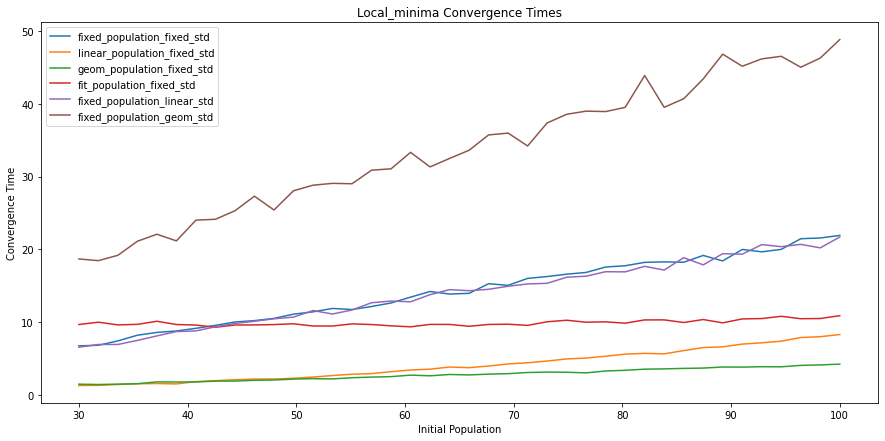

In [83]:
plot62d_population(pops[0], times_, "Local_minima Convergence Times")

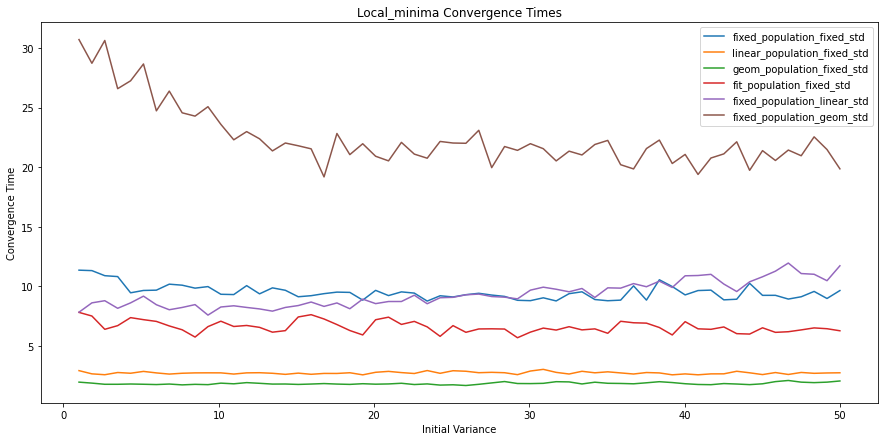

In [84]:
plot62d_variance(stds[:, 0], times_, "Local_minima Convergence Times")

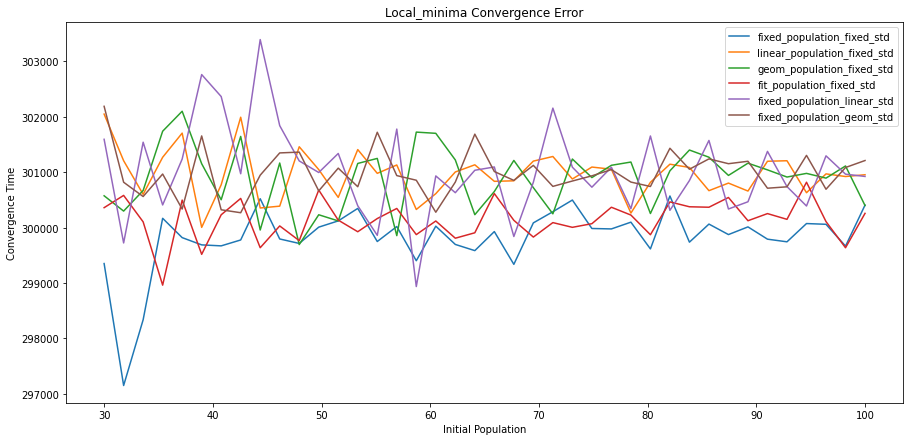

In [85]:
plot62d_population(pops[0], convergences_ , "Local_minima Convergence Error")

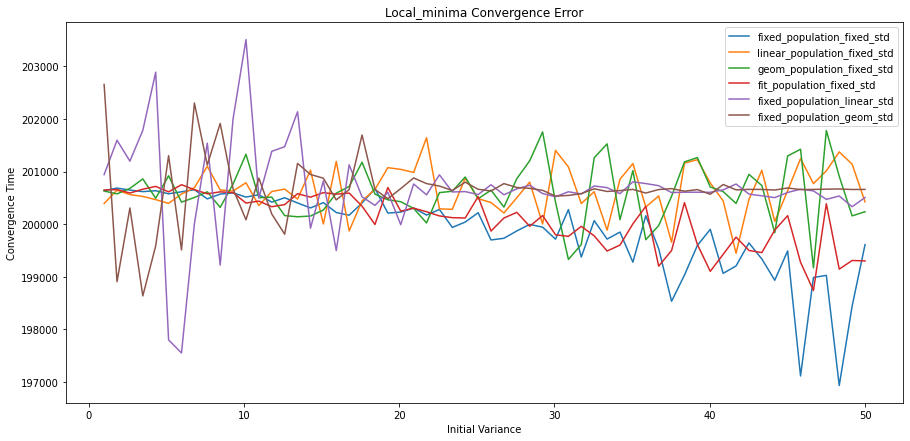

In [86]:
plot62d_variance(stds[:, 0], convergences_ , "Local_minima Convergence Error")

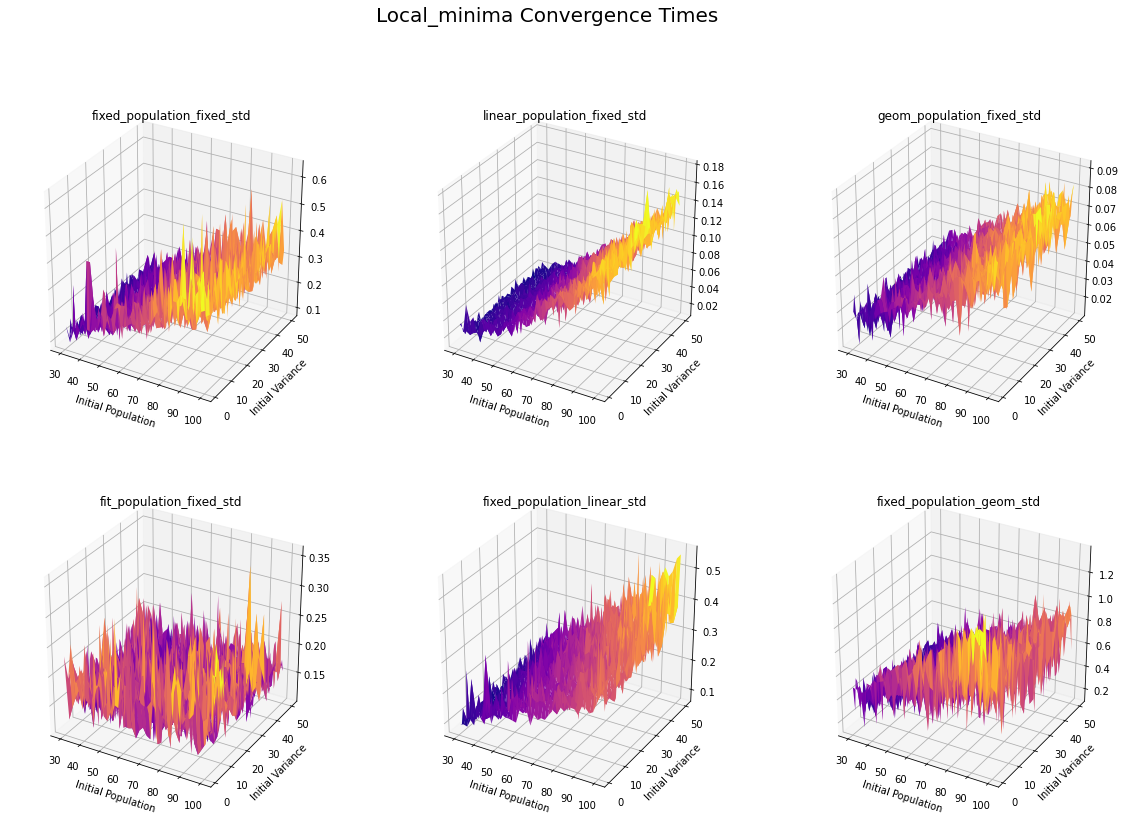

In [87]:
plot63d(pops, stds, times_, "Local_minima Convergence Times")

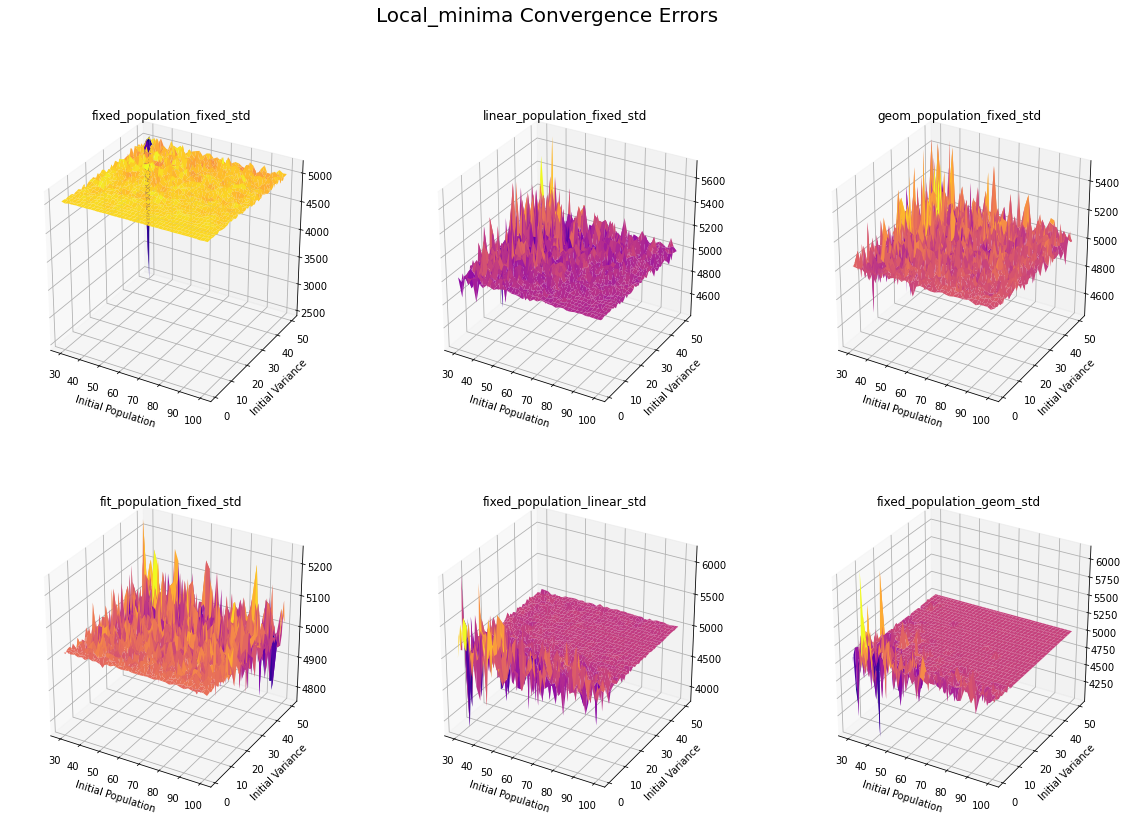

In [88]:
plot63d(pops, stds, convergences_, "Local_minima Convergence Errors")

NameError: ignored

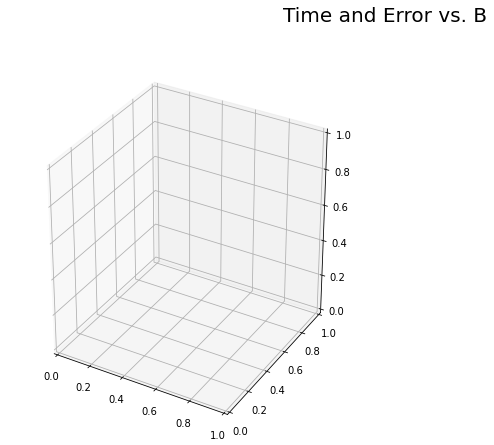

In [15]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Time and Error vs. B", fontsize = 20)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(pops, stds, times, cmap='plasma')
ax.set_xlabel("Initial Population")
ax.set_title("gg")

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(pops, stds, times, cmap='plasma')
# ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.plot_surface(pops, stds, times, cmap='plasma')
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot_surface(pops, stds, times, cmap='plasma')
# ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.plot_surface(pops, stds, times, cmap='plasma')
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot_surface(pops, stds, times, cmap='plasma')

In [ ]:
fig, axs = plt.subplots(2, 2, projection = '3d')
# axs[0, 0].projection = '3d'
axs[0, 0].plot_surface(pops, stds, times, cmap='plasma')

# axs[0, 1].projection = '3d'
axs[0, 1].plot_surface(pops, stds, times, cmap='plasma')

# axs[1, 0].projection = '3d'
axs[1, 0].plot_surface(pops, stds, times, cmap='plasma')

# axs[1, 1].projection = '3d'
axs[1, 1].plot_surface(pops, stds, times, cmap='plasma')
# ax.set_ylabel("Mutation variance")
# ax.set_xlabel("Startng Population")
# ax.set_zlabel("Second for convergence")
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(pops, stds, times, cmap='plasma')
ax.set_ylabel("Mutation variance")
ax.set_xlabel("Startng Population")
ax.set_zlabel("Second for convergence")

plt.show()
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(pops, stds, convergence, cmap='plasma')
ax.set_ylabel("Mutation variance")
ax.set_xlabel("Startng Population")
ax.set_zlabel("Convergence")

In [ ]:
plt.plot(np.sum(times, axis=-2))
plt.title("population vs time")

$$N_{t+1} = gN_{t+1}$$
$$N_{t+1} = N_{t+1} - b$$